# Swordfish usage example

In [61]:
import swordfish as sf
import numpy as np
import pylab as plt
from numpy.random import multivariate_normal
import healpy as hp
import harpix as harp
%matplotlib inline

## Import J-value map

In [62]:
def get_extragalactic():
    data = hp.read_map("/home/weniger/work/codes/swordfish/data/extragalactic_jfactors_2GeVsmooth.fits")
    sr_per_pix = 4*np.pi/len(data)
    data /= sr_per_pix  # GeV^2 / cm^5
    J = harp.HARPix.from_healpix(data, nest = False)
    return J
J = get_extragalactic()

NSIDE = 128
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


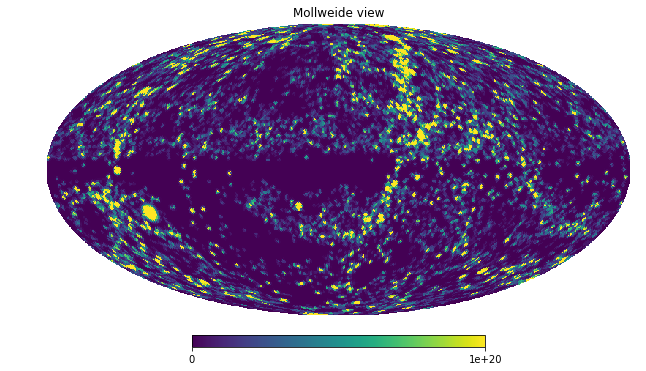

In [63]:
m = J.get_healpix(64)
hp.mollview(m, nest = True, min = 0, max = 1e20)

## Example model definition

### Signal and background fluxes
We consider an example with a (mostly) peaked signal and two background components.  Note that $noise$ and $flux$ are integrated over the bins (here simply done by multiplying with $dx$).

In [64]:
sig = J.get_data(mul_sr = True)*1e-20
B = harp.HARPix().add_iso(nside = 64, fill =1.).get_formatted_like(J)
bkg = B.get_data(mul_sr = True)

In [65]:
flux = [sig, bkg]
noise = flux[1]
exposure = np.ones_like(sig)*1.
constraints = [None, 0.1]

cov = sf.harpix_Sigma(J)
cov.add_systematics(err = B*1., sigma = 10., Sigma = None, nside = 64)
cov.add_systematics(err = B*1., sigma = 5., Sigma = None, nside = 64)
cov.add_systematics(err = B*1., sigma = 1., Sigma = None, nside = 64)

SF = sf.Swordfish(flux, noise, cov, exposure, constraints = constraints, solver='cg')
#EC = sf.EffectiveCounts(SF)
#ul = EC.upperlimit(0.05, 0)

466.497952273


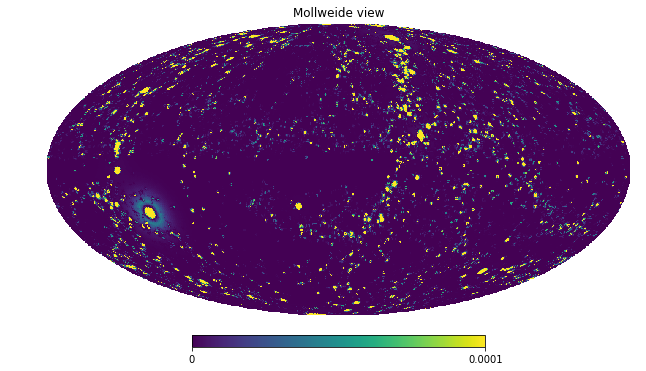

In [66]:
F = SF.effectiveinfoflux(0)
print F.sum()
hp.mollview(F, nest = True, min = 0, max = 1e-4)